# NHS Hydrometric Basins : Plotting Shapefiles

In [8]:
import pandas as pd
import geopandas as gpd
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
#from cartopy.io.shapereader import Reader
#from cartopy.feature import ShapelyFeature

In [9]:
shp = gpd.read_file("data/01/01AP005/01AP005_DrainageBasin_BassinDeDrainage.shp")

In [10]:
shp

StationNum                         NameNom  Status        Etat  Area_km2  \
0    01AP005  SAINT JOHN RIVER AT SAINT JOHN  active  en service   49471.6   

   Aire_km2                  Version        Date  \
0   49471.6  Prerelease/Préliminaire  2021-12-17   

                                            geometry  
0  POLYGON ((2037240.000 1283850.000, 2037240.000...

<AxesSubplot:>

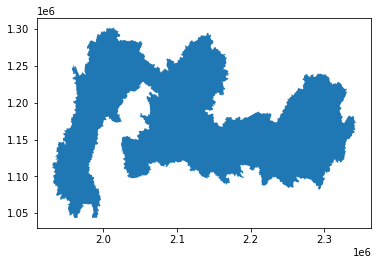

In [11]:
shp.plot()

In [12]:
shp.explore()

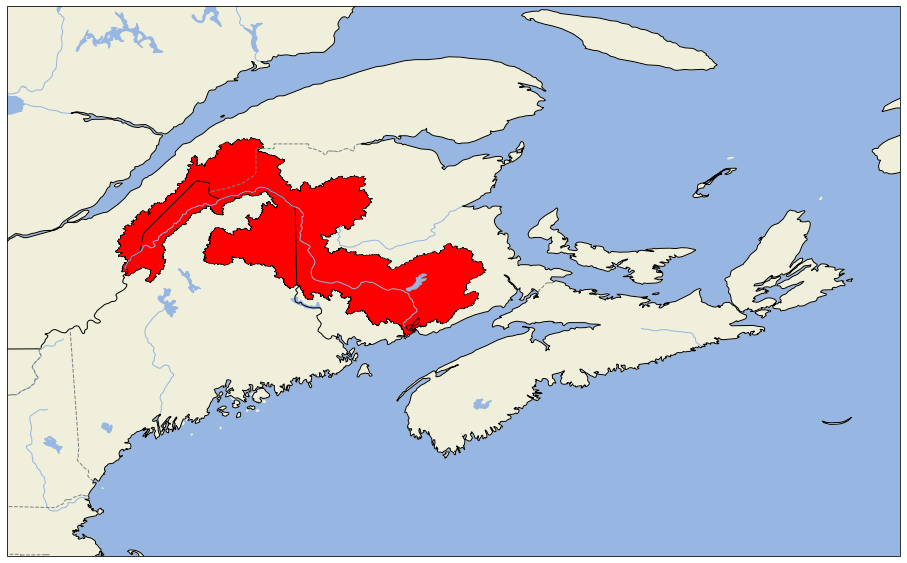

In [13]:
fig = plt.figure(figsize=(16,12), frameon=True)  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-72,-59,42,50])

scale = '10m'
ax.add_feature(cfeature.OCEAN.with_scale(scale))      
ax.add_feature(cfeature.LAND.with_scale(scale))       
ax.add_feature(cfeature.LAKES.with_scale(scale))   
   
ax.add_feature(cfeature.BORDERS.with_scale(scale)) 
ax.add_feature(cfeature.RIVERS.with_scale(scale))  
#scale = '10m'
coast = cfeature.NaturalEarthFeature(category='physical', scale=scale,    
                            facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')   

states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray', linestyle='dashed')

projection = ccrs.PlateCarree(central_longitude=0) 
shp = gpd.read_file("data/01/01AP005/01AP005_DrainageBasin_BassinDeDrainage.shp")
shp = shp.to_crs("EPSG:4326")
ax.add_geometries(shp.geometry,
                  projection,
                  facecolor='red',
                  edgecolor='black',
                  linewidth=0.5,
                  alpha=1,
                  zorder=1)

plt.show()

In [14]:
def add_basin(ax, station, facecolor='red', edgecolor='black', linewidth=1, alpha=1):
    
    fname = f"data/{station[0:2]}/{station}/{station}_DrainageBasin_BassinDeDrainage.shp"
    projection = ccrs.PlateCarree(central_longitude=0) 
    
    shp = gpd.read_file(fname)
    shp = shp.to_crs("EPSG:4326")
    ax.add_geometries(shp.geometry,
                  projection,
                  facecolor=facecolor,
                  edgecolor=edgecolor,
                  linewidth=linewidth,
                  alpha=alpha,
                  zorder=1)

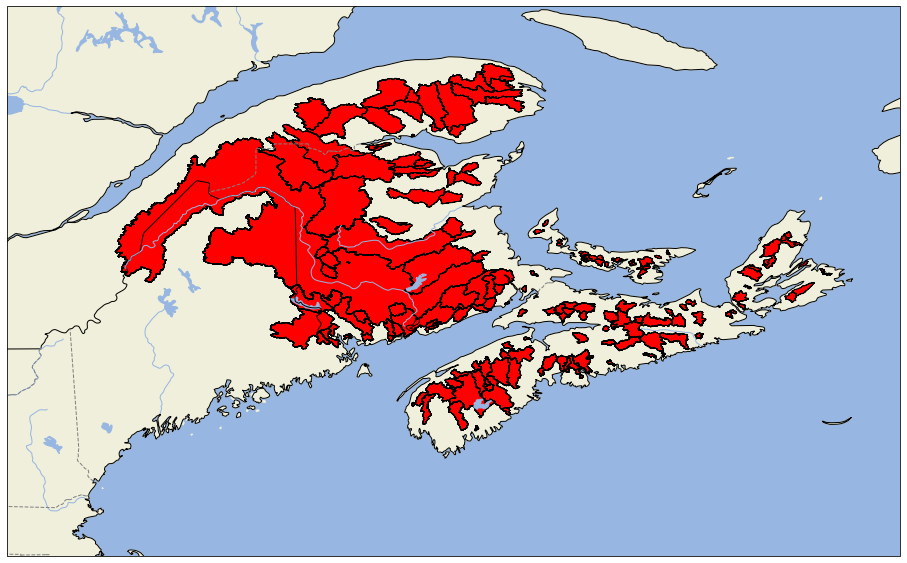

In [15]:
fig = plt.figure(figsize=(16,12), frameon=True)  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-72,-59,42,50])

scale = '10m'
ax.add_feature(cfeature.OCEAN.with_scale(scale))      
ax.add_feature(cfeature.LAND.with_scale(scale))       
ax.add_feature(cfeature.LAKES.with_scale(scale))   
   
ax.add_feature(cfeature.BORDERS.with_scale(scale)) 
ax.add_feature(cfeature.RIVERS.with_scale(scale))  
#scale = '10m'
coast = cfeature.NaturalEarthFeature(category='physical', scale=scale,    
                            facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')   

states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray', linestyle='dashed')

projection = ccrs.PlateCarree(central_longitude=0) 

p = Path(r'data/01/').glob('**/*')
stations = [x.stem for x in p if x.is_dir()]

for station in stations:
    add_basin(ax, station)

plt.show()

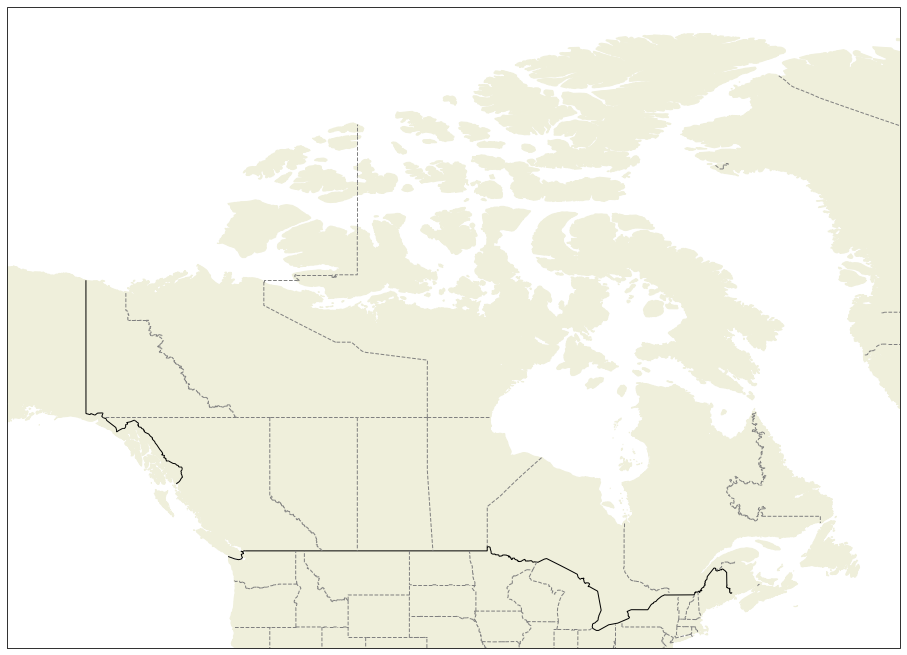

In [16]:
# test CRS and extent

fig = plt.figure(figsize=(16,12), frameon=True)  

#ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
#ax.set_extent([-136,-55,40,82]) # W, E, S, N
ax = plt.axes(projection=ccrs.Miller())
ax.set_extent([-146,-50,40,81]) # Can

scale = '10m'   
ax.add_feature(cfeature.LAND.with_scale(scale))       
ax.add_feature(cfeature.BORDERS.with_scale(scale)) 

states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray', linestyle='dashed')

plt.show()

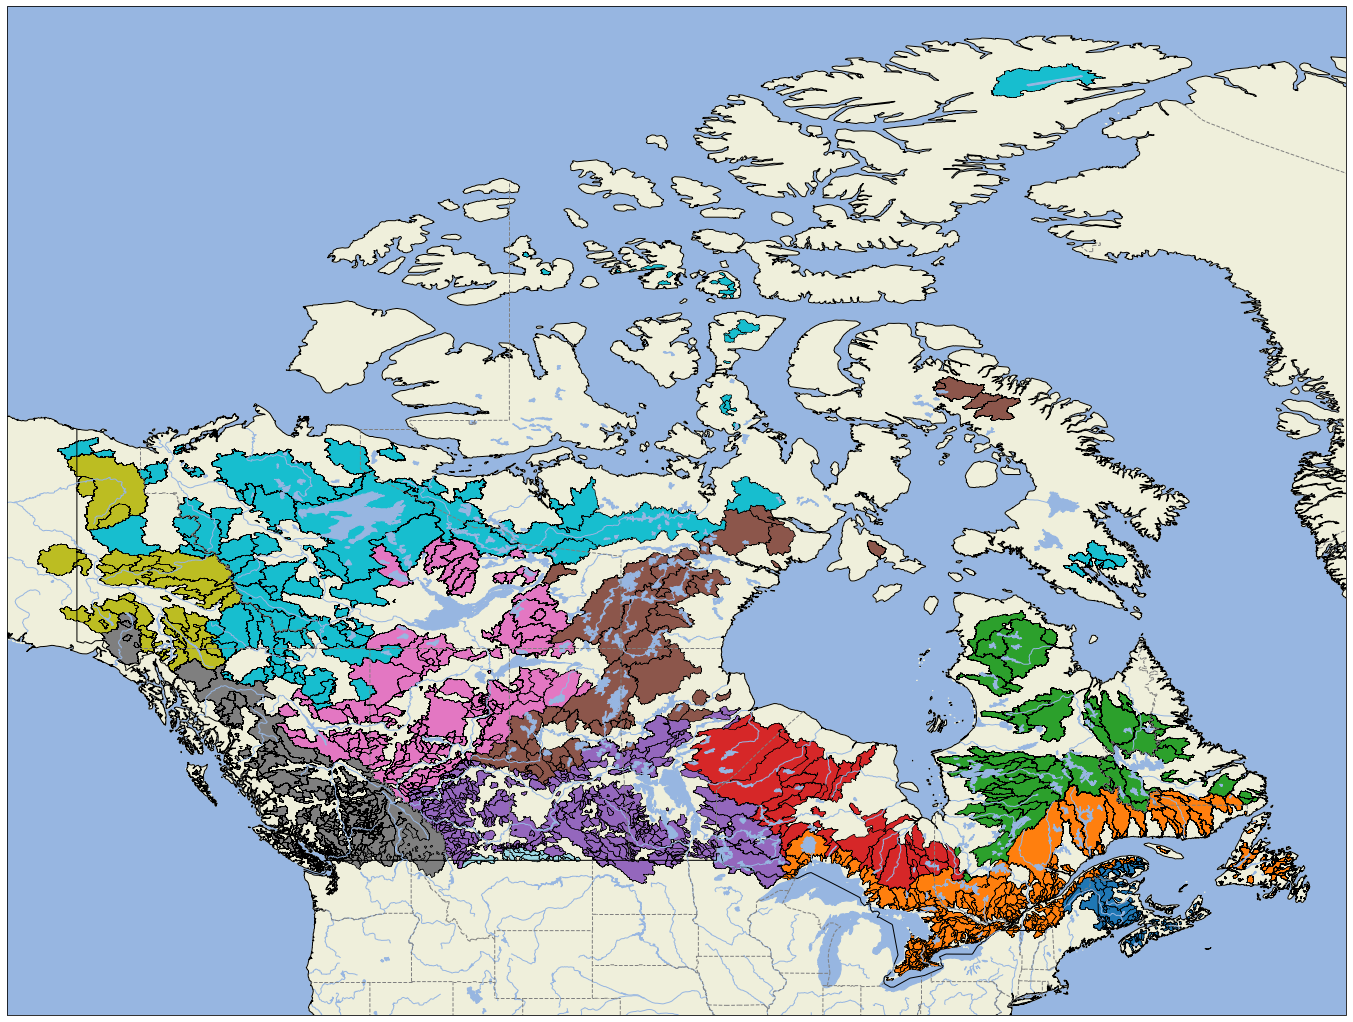

In [17]:
# Plot all NHS basins in Canada by region

fig = plt.figure(figsize=(24,20), frameon=True)  
ax = plt.axes(projection=ccrs.Miller())
ax.set_extent([-146,-50,40,81]) # Can

scale = '10m'
ax.add_feature(cfeature.OCEAN.with_scale(scale))      
ax.add_feature(cfeature.LAND.with_scale(scale))       
ax.add_feature(cfeature.LAKES.with_scale(scale))   
ax.add_feature(cfeature.BORDERS.with_scale(scale)) 
ax.add_feature(cfeature.RIVERS.with_scale(scale))  

coast = cfeature.NaturalEarthFeature(category='physical', scale=scale,    
                            facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')    

states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none')    
ax.add_feature(states_provinces, edgecolor='grey', linestyle='dashed')

cmap = cm.get_cmap('tab20', 11) 

for i in range(1,12):
    folder = f'{i:02}'
    p = Path(f'data/{folder}/').glob('**/*')
    stations = [x.stem for x in p if x.is_dir()]

    for station in stations:
        add_basin(ax, station, facecolor=cmap(i-1), edgecolor='black', linewidth=0.5)

plt.savefig('nhs_wsc_basins.png')